# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Load Data

In [3]:
# https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Understanding Data

In [4]:
# The class is a reserved keyword in Python, so you can't use it as an attribute name directly. df.class.unique() cant be used
unique_val = df['class'].unique()
null_columns = df.columns[df.isnull().any()]
null_count = df[null_columns].isnull().sum()

print(unique_val)
print(null_columns)
print(null_count)

['g' 'h']
Index([], dtype='object')
Series([], dtype: float64)


# Encoding

In [5]:
df["class"] = (df["class"] == "g").astype(int)

unique_val_new = df['class'].unique()
print(unique_val_new)


[1 0]


In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# Exploring data

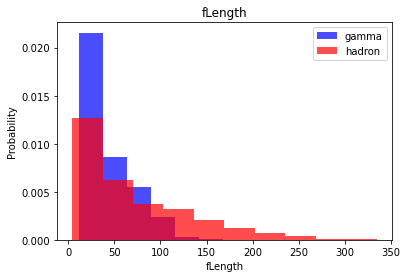

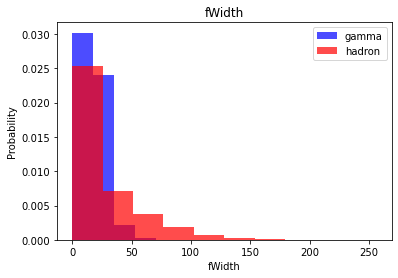

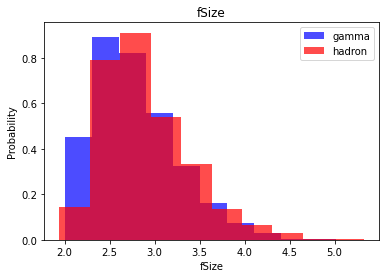

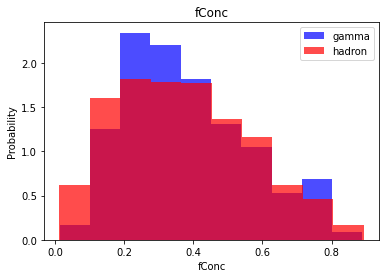

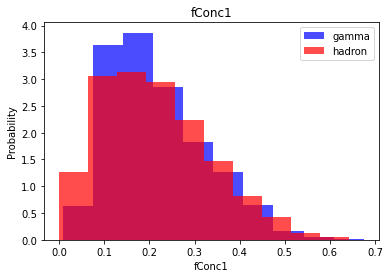

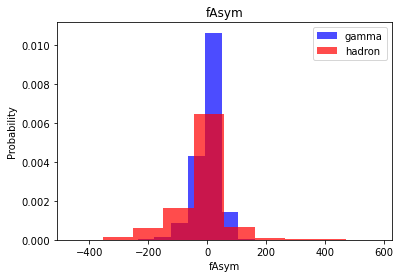

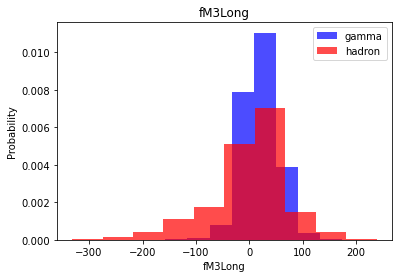

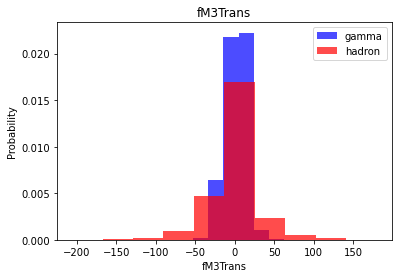

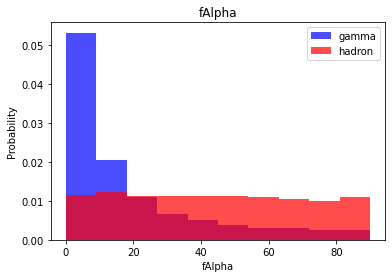

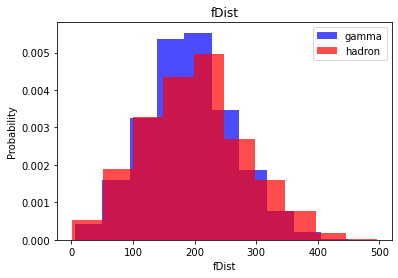

In [7]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

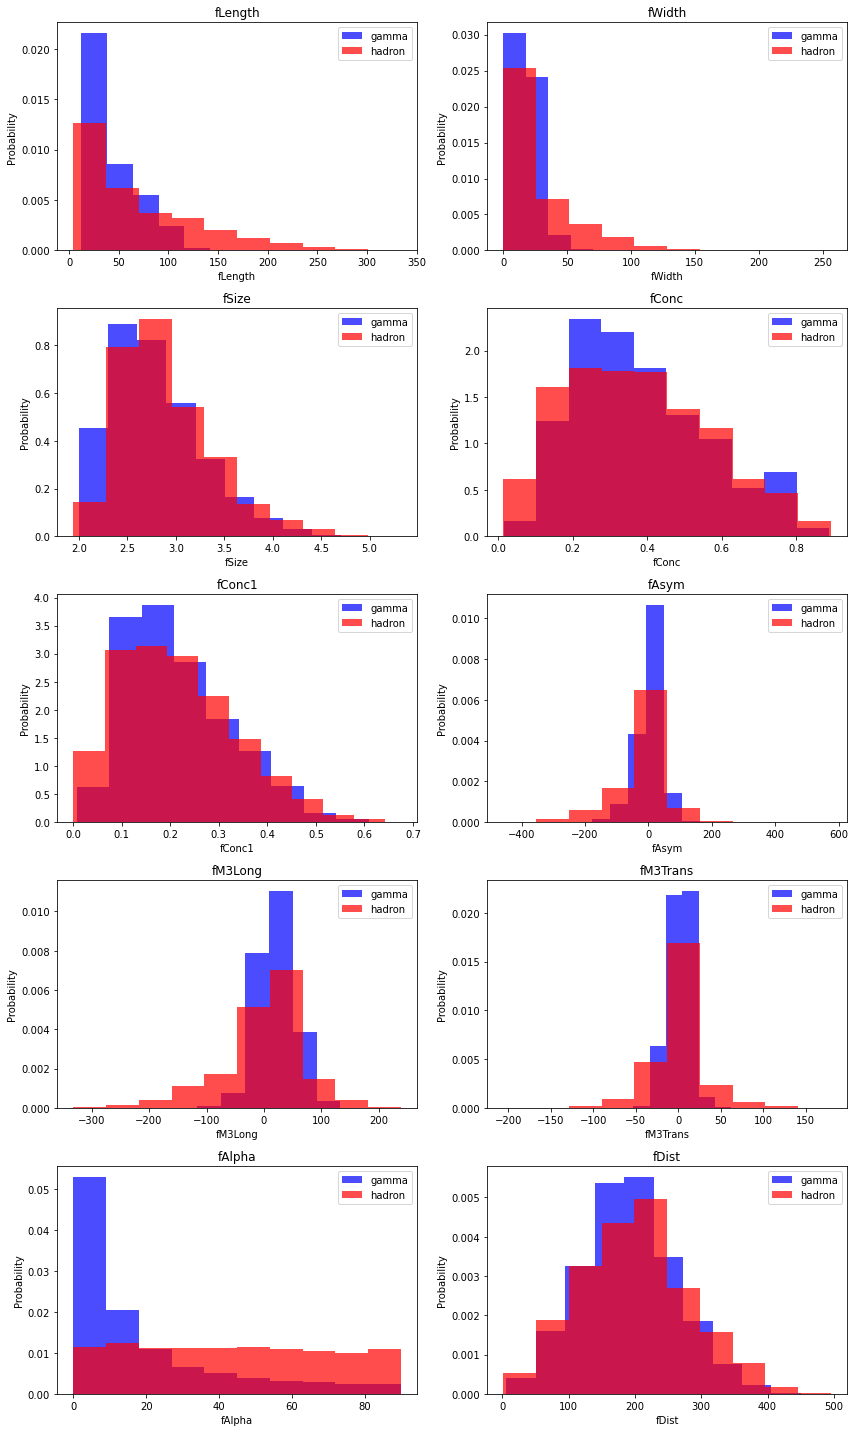

In [8]:
cols = df.columns

# Set up subplots with 2 columns
num_cols = len(cols) - 1
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Loop through each column except the last one (Last one is the 'class' column)
for i, label in enumerate(cols[:-1]):
    # Plot histograms for each class
    axes[i].hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    axes[i].hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)

    # Set labels and title
    axes[i].set_title(label)
    axes[i].set_ylabel("Probability")
    axes[i].set_xlabel(label)
    axes[i].legend()

# Remove any unused subplots
for j in range(num_cols, num_rows * 2):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Split Data

In [9]:
# df.sample(frac=1): This part shuffles the rows of the DataFrame (df) using the sample method 
# with frac=1, which means it takes a random sample of the entire DataFrame (equivalent to shuffling all rows). 
# This is done to ensure that the data is randomly distributed before splitting.
# [int(0.6*len(df)), int(0.8*len(df))]: This part defines the split points based on the lengths of the DataFrame. 0-60%, 60%-80% and 80%-100%

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [10]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Z-score Normalizing data
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

# Handling Imbalanced Data:
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

# Create updated Dataset
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [12]:
# Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
# Build and train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1315
           1       0.86      0.87      0.86      2489

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [16]:
# Imports
from sklearn.naive_bayes import GaussianNB

In [17]:
# Build and train model
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1315
           1       0.74      0.90      0.81      2489

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Log Regression

In [19]:
# Imports
from sklearn.linear_model import LogisticRegression

In [20]:
# Build and train model
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1315
           1       0.84      0.81      0.82      2489

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.78      0.77      0.77      3804



# SVM

In [22]:
# Imports
from sklearn.svm import SVC


In [23]:
# Build and train model
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1315
           1       0.88      0.89      0.89      2489

    accuracy                           0.85      3804
   macro avg       0.84      0.83      0.84      3804
weighted avg       0.85      0.85      0.85      3804

